In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

result1 = pd.read_excel(open('Data.xlsx','rb'),sheet_name = 'Final_Table',usecols=[4,5],names = ['5Day','1Day'],skiprows=0,nrows = 60)
goldprice = pd.read_excel(open('Data.xlsx','rb'),sheet_name='Gold',usecols=[4],names=['goldprice'],nrows= 60)
googprice = pd.read_excel(open('Stock_Price.xlsx', 'rb'),sheet_name='GOOG',usecols=[0,4],names = ['Date','gprice'],nrows = 60) 
crudeoilprice = pd.read_excel(open('Stock_Price.xlsx', 'rb'),sheet_name='CrudeOil',usecols=[4],names = ['cprice'],skiprows= [x for x in range(1,43)] +[61] ,nrows = 61)
spprice = pd.read_excel(open('Stock_Price.xlsx', 'rb'),sheet_name='S&P',names = ['sprice'],usecols=[4],nrows = 60) 
result = pd.concat([googprice, crudeoilprice, spprice,goldprice,result1], axis=1)

print(result)

         Date   gprice  cprice   sprice  goldprice      5Day        1Day
0  2021-11-01  2875.48   84.05  4613.67     1795.1  0.000000    0.000000
1  2021-11-02  2917.26   83.91  4630.65     1788.7  0.000000    0.000000
2  2021-11-03  2935.80   80.86  4660.57     1763.6  0.000000    0.000000
3  2021-11-04  2973.66   78.81  4680.06     1793.0  0.000000    0.000000
4  2021-11-05  2984.82   81.27  4697.53     1816.4  3.802496  -17.433198
5  2021-11-08  2987.03   81.93  4701.70     1827.4  2.391628   -9.836226
6  2021-11-09  2984.97   84.15  4685.25     1830.2  1.674842   -8.222754
7  2021-11-10  2932.52   81.34  4646.71     1847.6 -1.383480   34.557952
8  2021-11-11  2934.96   81.59  4649.27     1863.2 -1.670452  -45.111855
9  2021-11-12  2992.91   80.79  4682.85     1867.9  0.196851   36.713736
10 2021-11-15  2987.76   80.88  4682.80     1866.1  0.093468   -4.647887
11 2021-11-16  2981.52   80.76  4700.90     1853.6  1.670918    6.191531
12 2021-11-17  2981.24   78.36  4688.67     1869.7 

Text(0, 0.5, '1 Day')

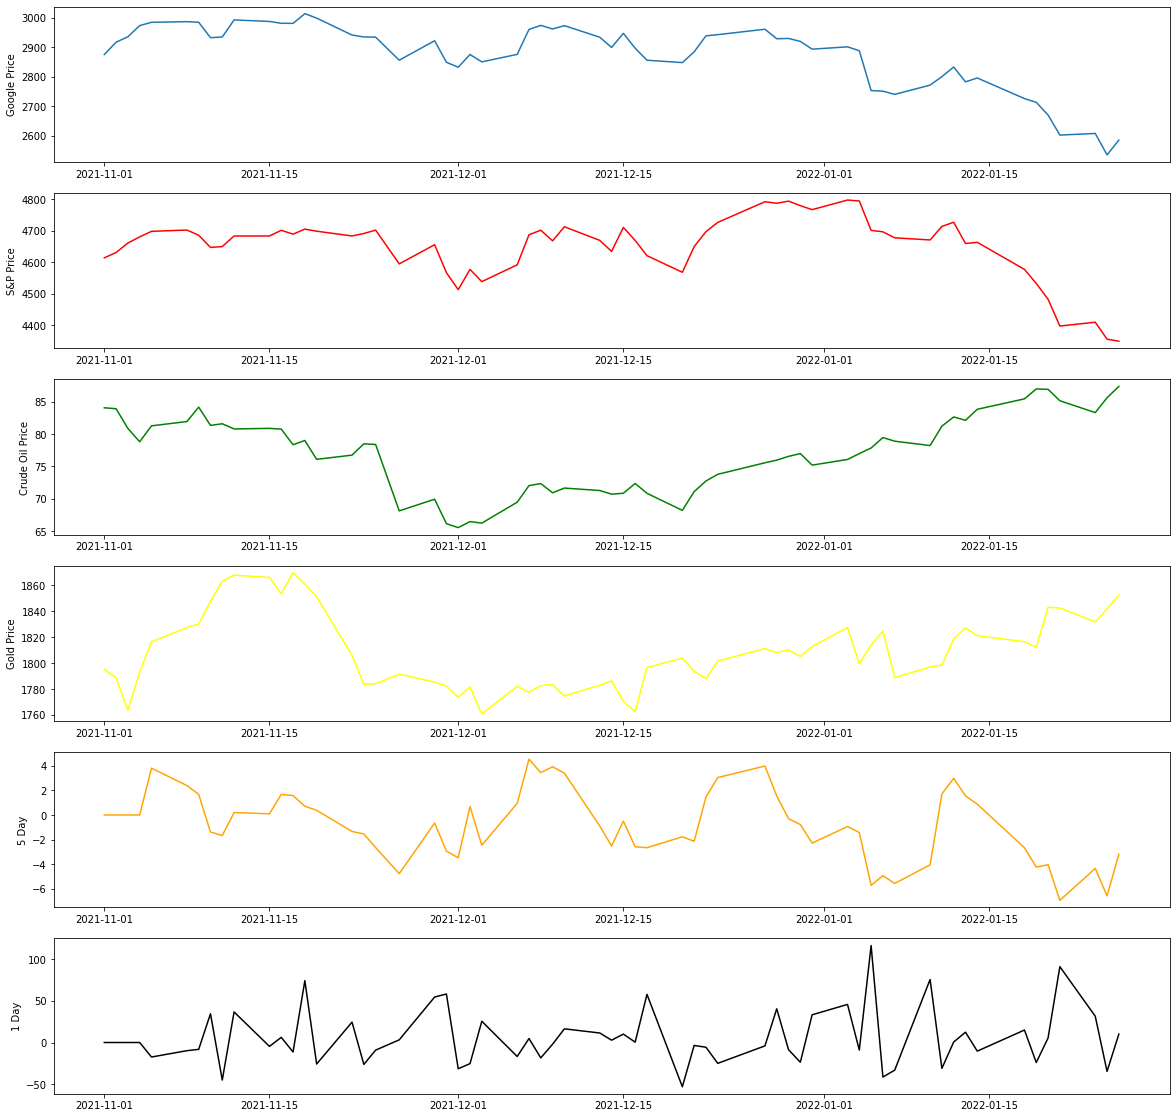

In [43]:
# create some fictive access data by hour
xdata = result['Date']
ydata = result['gprice']

# let us make a simple graph
fig,axs = plt.subplots(6,figsize=[20,20])

axs[0].plot(xdata, ydata)

ydata = result['sprice']
axs[1].plot(xdata, ydata,color= 'red')

ydata = result['cprice']
axs[2].plot(xdata, ydata,color= 'green')

ydata = result['goldprice']
axs[3].plot(xdata,ydata,color = 'yellow')

ydata = result['5Day']
axs[4].plot(xdata,ydata,color = 'orange')

ydata = result['1Day']
axs[5].plot(xdata,ydata,color = 'black')

# set the basic properties
axs[0].set_ylabel('Google Price')
axs[1].set_ylabel('S&P Price')
axs[2].set_ylabel('Crude Oil Price')
axs[3].set_ylabel('Gold Price')
axs[4].set_ylabel('5 Day')
axs[5].set_ylabel('1 Day')

# set the limits
#ax.set_xlim(0, 24)
#ax.set_ylim(6, 24)

# set the grid on
#axs.grid('on')

2875.48 2817.2247797124055
2987.03 2929.3199090506223
2938.98 2948.0726060851594
2753.07 2845.1672702298883
3014.18 2947.0957990233305
2713.04 2706.9786354053613
2856.06 2868.504599821657
2771.48 2836.38017281327
2981.24 2955.4585816186627
2607.44 2667.359338390727
2751.02 2845.02941911235
2832.96 2942.5117871774096


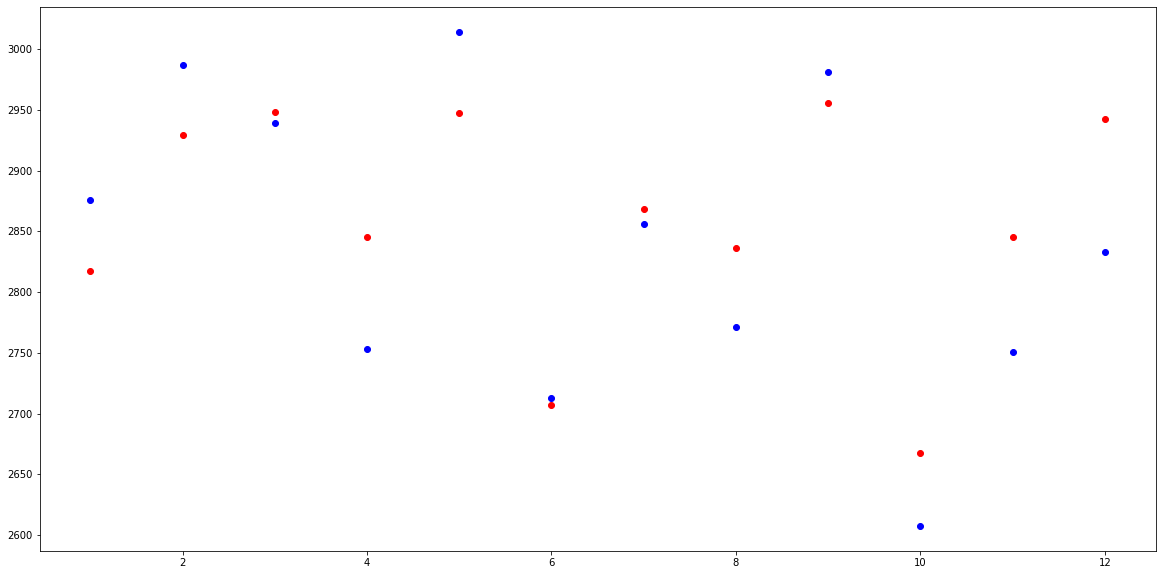

In [103]:
#independent variables
X = result[['sprice','cprice','goldprice','1Day','5Day']]

#dependent variables
y = result['gprice']

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_prediction =  regr.predict(x_test)
y_prediction

test = y_test.tolist()

# next_12 = pd.read_excel(open('Stock_Price.xlsx', 'rb'),sheet_name='GOOG',usecols=[4],names = ['gprice'],skiprows=60,nrows = 12) 
# actual = next_12.values.tolist()
# next_8 = [[4326.51,86.61],[4431.85,86.82],[4515.55,88.15],[4546.54,88.2],[4589.38,88.26],[4477.44,90.27],[4500.53,92.31],[4483.87,91.32]]

for i in range(12):
    print(test[i],y_prediction[i])


plt.figure(figsize=(20, 10))
plt.scatter(range(1,13),test,color= 'Blue')
plt.scatter(range(1,13),y_prediction,color= 'Red')

In [104]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.7161548770790205
mean_sqrd_error is== 4107.251018103431
root_mean_squared error of is== 64.08783830106482
